https://drive.google.com/file/d/1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI/view?usp=sharing

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

In [2]:
! gdown --id 1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI
To: /content/uk-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 93.3MB/s]


In [3]:
! unzip /content/uk-used-cars.zip -d /content/uk-used-cars

Archive:  /content/uk-used-cars.zip
  inflating: /content/uk-used-cars/audi.csv  
  inflating: /content/uk-used-cars/bmw.csv  
  inflating: /content/uk-used-cars/cclass.csv  
  inflating: /content/uk-used-cars/focus.csv  
  inflating: /content/uk-used-cars/ford.csv  
  inflating: /content/uk-used-cars/hyundi.csv  
  inflating: /content/uk-used-cars/merc.csv  
  inflating: /content/uk-used-cars/skoda.csv  
  inflating: /content/uk-used-cars/toyota.csv  
  inflating: /content/uk-used-cars/unclean cclass.csv  
  inflating: /content/uk-used-cars/unclean focus.csv  
  inflating: /content/uk-used-cars/vauxhall.csv  
  inflating: /content/uk-used-cars/vw.csv  


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/uk-used-cars/bmw.csv')

In [6]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


**Обучающая и тестовая выборка**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, random_state=42)

**Анализ данных**

In [9]:
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [10]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

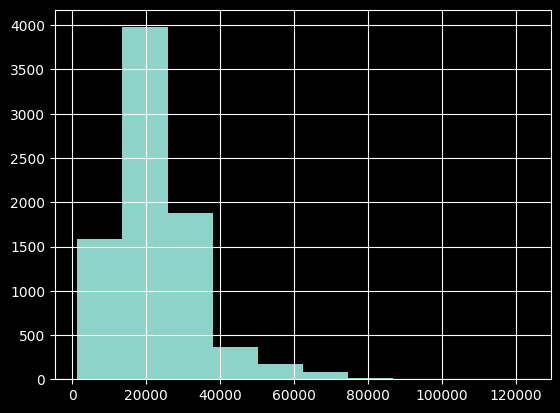

In [11]:
train['price'].hist()

In [12]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [13]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


<Axes: xlabel='year'>

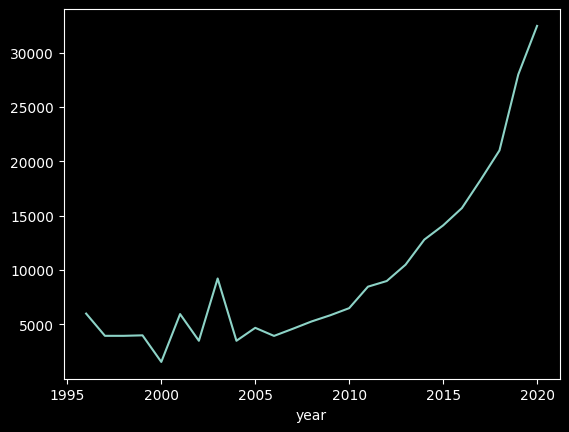

In [14]:
train.groupby('year')['price'].median().plot()

**Baseline** - минимальная модель

In [15]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [16]:
train['price_pred_mean'] = train['price'].mean()

In [17]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645
...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645


In [18]:
train['err'] = train['price_pred_mean'] - train['price']

In [19]:
train['err_abs'] = abs(train['err'])

In [20]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645


In [21]:
train['err_abs'].mean() #ошибка модели - 8450

8450.556631461715

In [22]:
(train['err_abs'] / train['price']).mean() #ошибается на 50%

0.48316912602731443

С медианой

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [24]:
mean_absolute_error(train['price'], train['price_pred_mean'])

8450.556631461715

In [25]:
mean_absolute_percentage_error(train['price'], train['price_pred_mean'])

0.48316912602731443

На тесте

In [26]:
test['price_pred_median'] = train['price'].median()

In [27]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0


In [28]:
mean_absolute_error(test['price'], test['price_pred_median'])

8211.845697329376

In [29]:
mean_absolute_percentage_error(test['price'], test['price_pred_median']) 

0.409212791738344

Алгоритм на основе года

In [30]:
model_year_mean = train.groupby('year')['price'].mean().reset_index()

In [31]:
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [32]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [33]:
train = train.merge(model_year_mean, how='left', on='year')

In [34]:
mean_absolute_error(train['price'], train['price_pred_year_mean'])

5474.243598515644

In [35]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_mean'])

0.2447228468704618

In [36]:
test = test.merge(model_year_mean, how='left', on='year')

In [37]:
test.isna().mean()

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [38]:
mean_absolute_error(test['price'], test['price_pred_year_mean'])

5426.271071211102

In [39]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_mean']) 

0.23933940428873632

Медиана по году

In [40]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [41]:
model_year_median.columns

Index(['year', 'price'], dtype='object')

In [42]:
model_year_median.columns = ['year', 'price_pred_year_median']

In [43]:
train = train.merge(model_year_median, how='left', on='year')

In [44]:
mean_absolute_error(train['price'], train['price_pred_year_mean'])

5474.243598515644

In [45]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_mean'])

0.2447228468704618

In [46]:
mean_absolute_error(train['price'], train['price_pred_year_median'])

5232.327891156463

In [47]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_median'])

0.21723436816638503

In [48]:
test = test.merge(model_year_median, how='left', on='year')

In [49]:
test.isna().mean()

model                     0.0
year                      0.0
price                     0.0
transmission              0.0
mileage                   0.0
fuelType                  0.0
tax                       0.0
mpg                       0.0
engineSize                0.0
price_pred_median         0.0
price_pred_year_mean      0.0
price_pred_year_median    0.0
dtype: float64

In [50]:
mean_absolute_error(test['price'], test['price_pred_year_median'])

5240.677299703264

In [51]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_median']) 

0.21478293590399475

Еще одна переменная

In [52]:
train.groupby('engineSize')['price'].agg(['count','mean','median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [53]:
def engine_group(x):
  if x <= 1.5:
    return '<=1.5'
  elif x <= 2:
    return '<=2'
  return '>2'

In [54]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [55]:
train.groupby('engine_group')['price'].agg(['count','mean','median'])

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


In [56]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [57]:
model_year_engine_median

,year,engine_group,price
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [58]:
t = train.pivot_table(index='year', columns='engine_group', values='price', aggfunc='median')

In [59]:
import seaborn as sns

<Axes: xlabel='engine_group', ylabel='year'>

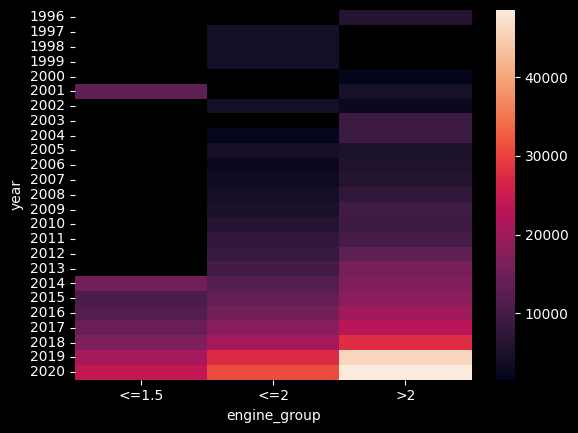

In [60]:
sns.heatmap(t)

In [61]:
model_year_engine_median = model_year_engine_median.rename({'price':'price_pred_year_engine_median'},axis=1)

In [62]:
train = train.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [63]:
mean_absolute_error(train['price'], train['price_pred_year_engine_median'])

3659.774273345702

In [64]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine_median'])

0.1582922021242831

In [65]:
test['engine_group'] = test['engineSize'].apply(engine_group)

In [66]:
test = test.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [67]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

In [68]:
test[test['price_pred_year_engine_median'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2,NaN


In [69]:
mean_absolute_error(train['price'], test['price_pred_year_engine_median'])

ValueError: ignored

In [95]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine_median'])

0.1582922021242831

In [70]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [71]:
error(train['price'], train['price_pred_year_median'])

5232.327891156463
0.21723436816638503


In [72]:
error(test['price'], test['price_pred_year_median'])

5240.677299703264
0.21478293590399475


In [73]:
error(train['price'], train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [74]:
test_no_nan = test.dropna().copy()

In [75]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median'])

3790.014291017075
0.16270961023342095


In [76]:
train.groupby('transmission')['price'].agg(['count', 'mean'])

,count,mean
transmission,,
Automatic,2698,22413.452187
Manual,1925,14557.851429
Semi-Auto,3462,27377.835066


In [78]:
model_year_engine_median

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [79]:
train.groupby('year')['price'].agg(['count', 'median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


In [97]:
train['year_group'] = pd.cut(train['year'], [0, 2010,2012, 2014, 2016, 2018, float('inf')])

In [98]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,11041.347826,10490.0,<=2,9990.0,"(2012.0, 2014.0]"
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]"
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,15086.536313,14103.5,>2,18144.5,"(2014.0, 2016.0]"
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,31066.986143,27980.0,<=2,27294.0,"(2018.0, inf]"
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,15086.536313,14103.5,<=1.5,10999.0,"(2014.0, 2016.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,22562.450394,21000.0,<=2,20750.0,"(2016.0, 2018.0]"
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,16531.655222,15699.5,>2,19996.5,"(2014.0, 2016.0]"
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,31066.986143,27980.0,<=2,27294.0,"(2018.0, inf]"
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,16531.655222,15699.5,<=2,15500.0,"(2014.0, 2016.0]"


In [99]:
train.groupby('year_group')['price'].agg(['count', 'median'])

,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


In [100]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()

In [101]:
model_year_engine_group_median


,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,8470.0
5,"(2010.0, 2012.0]",>2,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2,10998.0
8,"(2012.0, 2014.0]",>2,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


In [102]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price':'pred_price_year_engine_group_median'}, axis=1)

In [107]:
train = train.merge(model_year_engine_group_median, how='left', on=['year_group', 'engine_group'])

In [104]:
error(train['price'], train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [108]:
error(train['price'], train['pred_price_year_engine_group_median'])

3827.4336425479282
0.1693848259731495


In [109]:
model_year_engine_trn_group_median = (train.groupby(['year_group', 
                                                    'engine_group', 
                                                    'transmission'])
                                            ['price'].median().reset_index())

In [111]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [115]:
model_year_engine_trn_group_median = model_year_engine_trn_group_median.rename({'price':'price_pred_year_engine_trn_median'}, axis=1)

In [118]:
train = train.merge(model_year_engine_trn_group_median, how='left', on=["year_group", 'engine_group', 'transmission'])

In [119]:
error(train['price'], train['price_pred_year_engine_trn_median'])

3635.5412492269634
0.1561691679065392


In [120]:
test['year_group'] = pd.cut(test['year'], [0, 2010,2012, 2014, 2016, 2018, float('inf')])

In [124]:
test = test.merge(model_year_engine_trn_group_median, how='left', on=["year_group", 'engine_group', 'transmission'])

In [125]:
test.isna().mean()

model                                  0.000000
year                                   0.000000
price                                  0.000000
transmission                           0.000000
mileage                                0.000000
fuelType                               0.000000
tax                                    0.000000
mpg                                    0.000000
engineSize                             0.000000
price_pred_median                      0.000000
price_pred_year_mean                   0.000000
price_pred_year_median                 0.000000
engine_group                           0.000000
price_pred_year_engine_median          0.000742
year_group                             0.000000
pred_price_year_engine_group_median    0.000000
price_pred_year_engine_trn_median      0.001113
dtype: float64

In [126]:
test_no_na = test.dropna().copy()

In [128]:
error(test_no_na['price'], test_no_na['price_pred_year_engine_trn_median'])

3777.5172798216277
0.16037327734163415
